In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r"/content/Heart Dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
def chest_pain(row):
    if row==1:
        return 'Typical Angina'
    elif row==2:
        return 'Atypical Angina'
    elif row==3:
        return 'Non-Anginal pain'
    elif row==4:
        return 'Asymptomatic'

In [ ]:
df['Chest_Pain']=df['chest_pain_type'].apply(chest_pain)

In [ ]:
target=df.groupby('target').size()
target

target
0    499
1    526
dtype: int64

In [ ]:
def heart_disease(series):
    if series==0:
        return 'Absent'
    elif series==1:
        return 'Present'

In [ ]:
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent


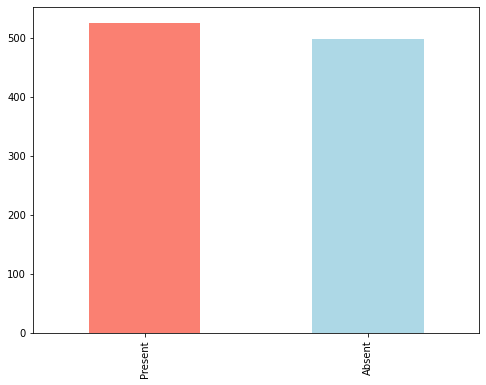

In [ ]:
df['Heart_Disease'].value_counts().plot(kind='bar', figsize=(8, 6), color=["salmon","lightblue"])

In [ ]:
hd=df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absent     499
Present    526
Name: target, dtype: int64

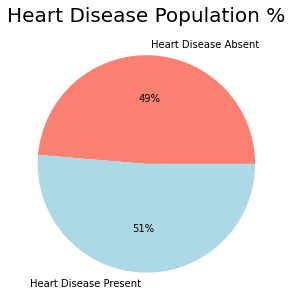

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(hd, labels=['Heart Disease Absent','Heart Disease Present'],colors=['salmon','lightblue'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

In [ ]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


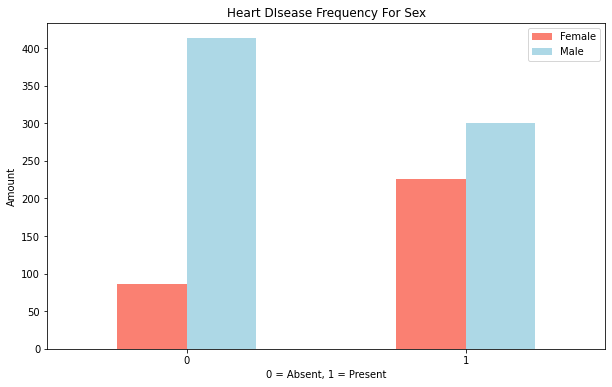

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart DIsease Frequency For Sex")
plt.xlabel("0 = Absent, 1 = Present")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [ ]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

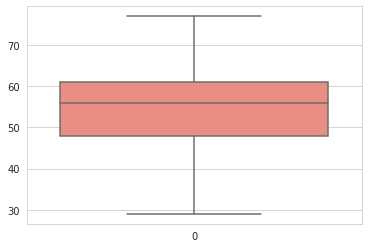

In [ ]:
sns.set_style("whitegrid")

sns.boxplot(data=df['age'],color='salmon')

In [ ]:
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [ ]:
Young=df[(df['age']>=29) & (df['age']<40)]
Middle_Aged=df[(df['age']>=40) & (df['age']<55)]
Elderly=df[(df['age']>55)]
print('Young =',len(Young))
print('Middle Aged =',len(Middle_Aged))
print('Elderly =',len(Elderly))

Young = 57
Middle Aged = 419
Elderly = 519


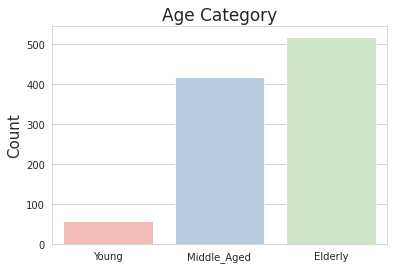

In [ ]:
sns.barplot(x=['Young','Middle_Aged','Elderly'], y=[len(Young), len(Middle_Aged), len(Elderly)], palette='Pastel1')
plt.title('Age Category', fontsize=17)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [ ]:
df['sex1']=df['sex'].apply(gender)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease,sex1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent,Female


In [ ]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young'
    elif row>=40 and row<55:
        return 'Middle Aged'
    elif row>55:
        return 'Elderly'

In [ ]:
df['Age_Range']=df['age'].apply(age_range)
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,Chest_Pain,Heart_Disease,sex1,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,None,Absent,Male,Middle Aged
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,None,Absent,Male,Middle Aged
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,None,Absent,Male,Elderly
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,None,Absent,Male,Elderly
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,None,Absent,Female,Elderly


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


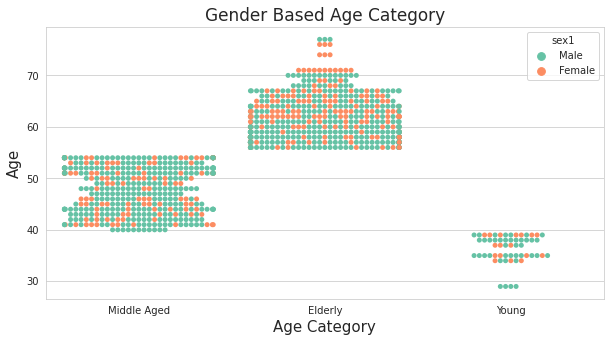

In [ ]:
plt.figure(figsize=(10,5))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=df, palette='Set2')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

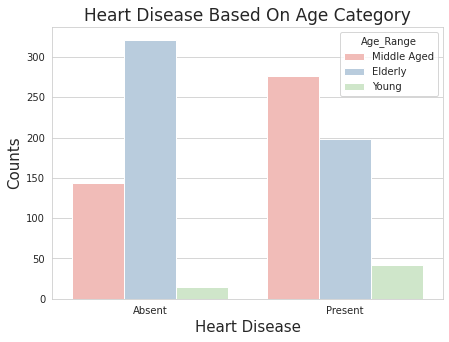

In [ ]:
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=df,  palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'Chest_Pain',
       'Heart_Disease', 'sex1', 'Age_Range'],
      dtype='object')

In [ ]:
df['resting_blood_sugar'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting_blood_sugar, dtype: float64

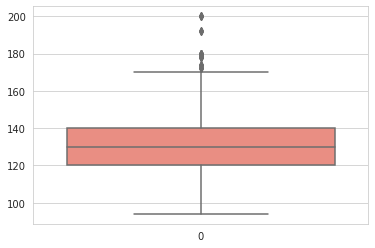

In [ ]:
sns.boxplot(data=df['resting_blood_sugar'],color='salmon')

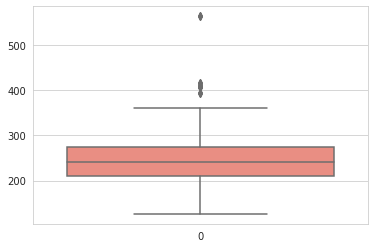

In [ ]:
sns.boxplot(data=df['cholesterol'],color='salmon')

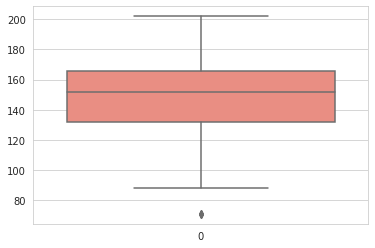

In [ ]:
sns.boxplot(data=df['max_heart_rate_achieved'],color='salmon')

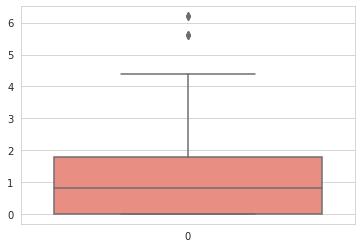

In [ ]:
sns.boxplot(data=df['st_depression'],color='salmon')

In [ ]:
df1=df.copy()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [ ]:
low_chol, upp_chol = remove_outlier(df1['cholesterol'])
low_chol
df1['cholesterol'] = np.where(df1['cholesterol']>upp_chol, upp_chol, df1['cholesterol'])
df1['cholesterol'] = np.where(df1['cholesterol']<low_chol, low_chol, df1['cholesterol'])

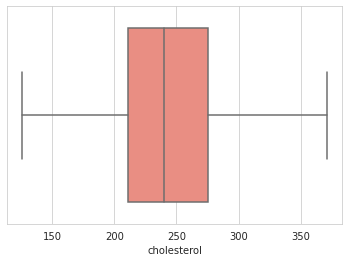

In [ ]:
sns.boxplot(x = 'cholesterol', data = df1,color='salmon')

In [ ]:
low_depr, upp_depr = remove_outlier(df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']>upp_depr, upp_depr, df1['st_depression'])
df1['st_depression'] = np.where(df1['st_depression']<low_depr, low_depr, df1['st_depression'])

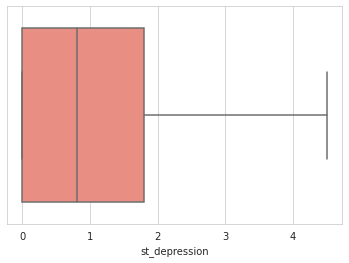

In [ ]:
sns.boxplot(x = 'st_depression', data = df1,color='salmon')

In [ ]:
low_hrate, upp_hrate = remove_outlier(df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']>upp_hrate, upp_hrate, df1['max_heart_rate_achieved'])
df1['max_heart_rate_achieved'] = np.where(df1['max_heart_rate_achieved']<low_hrate, low_hrate, df1['max_heart_rate_achieved'])

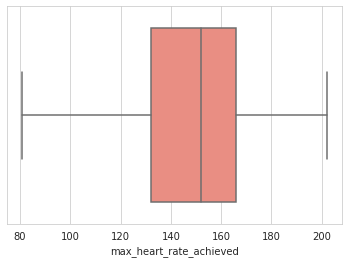

In [ ]:
sns.boxplot(x = 'max_heart_rate_achieved', data = df1,color='salmon')

In [ ]:
low_rbs, upp_rbs = remove_outlier(df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']>upp_rbs, upp_rbs, df1['resting_blood_sugar'])
df1['resting_blood_sugar'] = np.where(df1['resting_blood_sugar']<low_rbs, low_rbs, df1['resting_blood_sugar'])

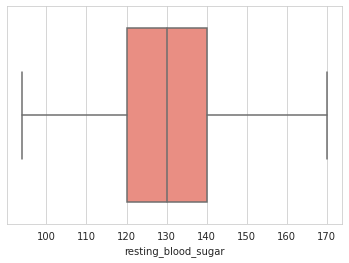

In [ ]:
sns.boxplot(x = 'resting_blood_sugar', data = df1,color='salmon')

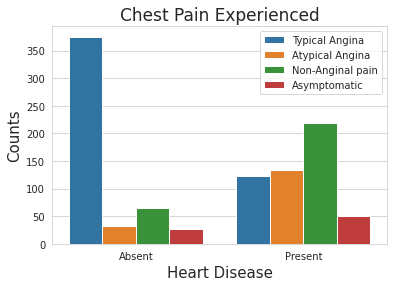

In [ ]:
##Count Plot Creation of Chest Pain Experienced
%matplotlib inline
sns.countplot(x=df1['Heart_Disease'], hue='chest_pain_type', data=df1)
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'Chest_Pain',
       'Heart_Disease', 'sex1', 'Age_Range'],
      dtype='object')

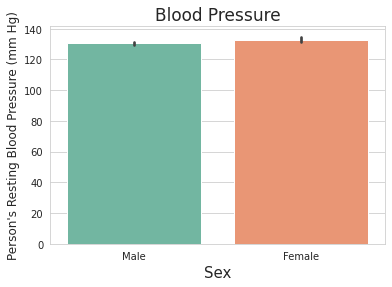

In [ ]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg)

sns.barplot(x='sex1', y='resting_blood_sugar', data=df1, palette='Set2')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

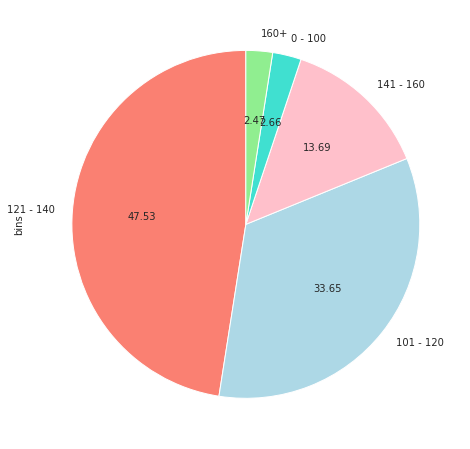

In [ ]:
df1['bins'] = pd.cut(df1['resting_blood_sugar'],bins=[0,100,120,140,160,180], labels=["0 - 100","101 - 120","121 - 140","141 - 160","160+"])
plt.figure(figsize=(8,8))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["salmon","lightblue","pink","turquoise","lightgreen"],startangle=90)

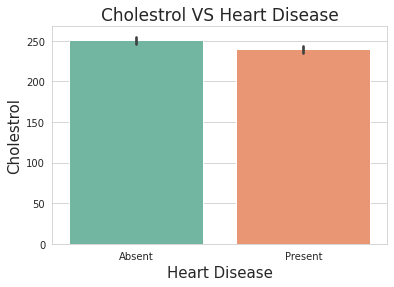

In [ ]:
sns.barplot(x='Heart_Disease', y='cholesterol', data=df1, palette='Set2')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

Text(0.0, 1.0, 'Cholestrol details against target\n')

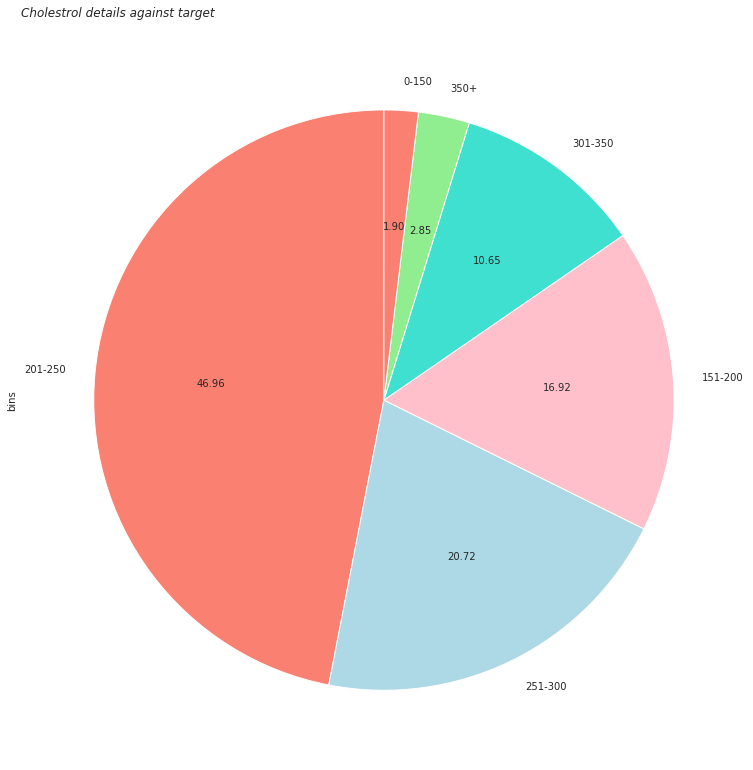

In [ ]:
df1['bins'] = pd.cut(df1['cholesterol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
plt.figure(figsize=(13,14))
df1[df1['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["salmon","lightblue","pink","turquoise","lightgreen"],startangle=90,fontsize=10)
plt.title(label="Cholestrol details against target\n",loc="left",fontstyle='italic')

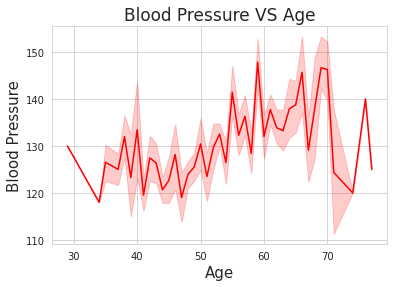

In [ ]:
sns.lineplot(x='age', y='resting_blood_sugar', data=df1, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

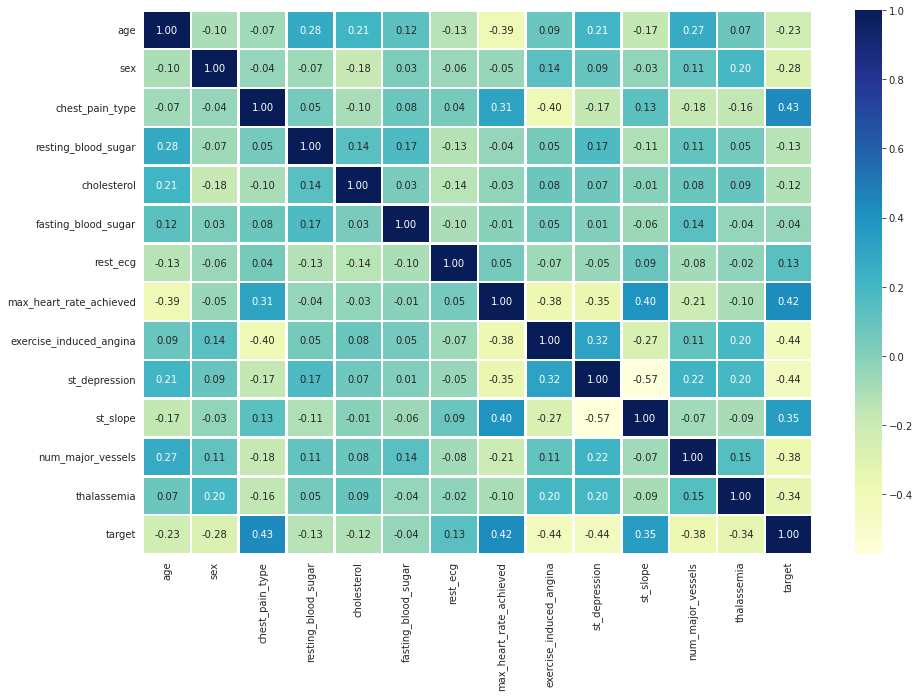

In [ ]:
corr_matrix = df1.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=1.5,
                fmt=".2f",
                cmap="YlGnBu");

Text(0.5, 1.0, 'Max Heart Rate achieved v/s Age \n')

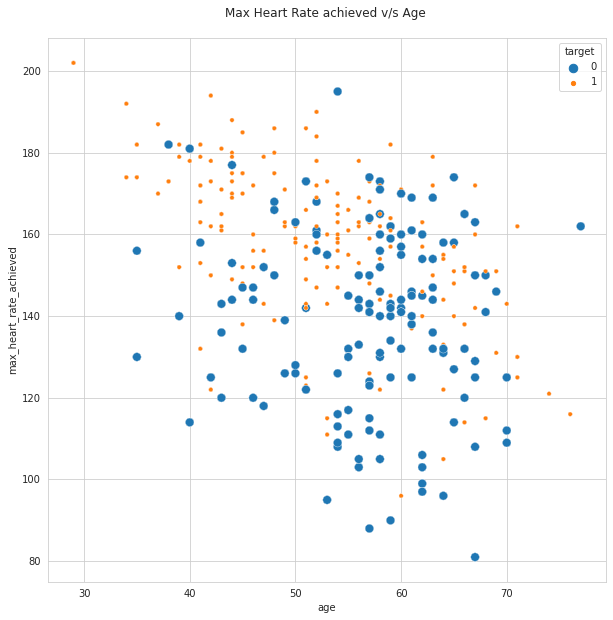

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x='age', y='max_heart_rate_achieved',hue='target',data=df1,size='target')
plt.title("Max Heart Rate achieved v/s Age \n")

Text(0.5, 1.0, 'Cholesterol v/s Age \n')

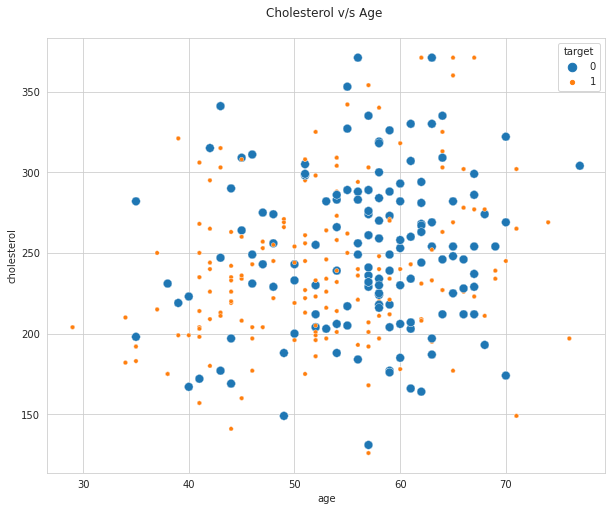

In [ ]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='age', y='cholesterol',hue='target',data=df1,size='target')
plt.title("Cholesterol v/s Age \n")

Text(0.5, 1.0, 'max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n')

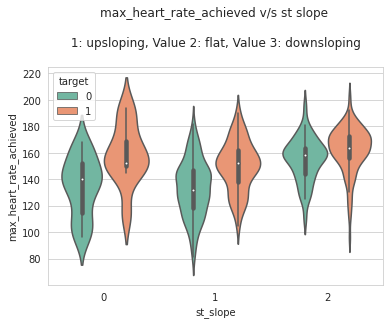

In [ ]:
ax = sns.violinplot(x="st_slope", y="max_heart_rate_achieved", hue="target",data=df1, palette="Set2")
plt.title("max_heart_rate_achieved v/s st slope \n \n 1: upsloping, Value 2: flat, Value 3: downsloping \n")

In [ ]:
df.to_csv('Heart Disease Diagnostic.csv', sep='\t')